# Name : Snehal Shyam Jagtap

## Assignement No 16



### K-NEAREST NEIGHBOURS
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

### Step 1: Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Step 2: Load the Dataset

In [14]:
# Load the Zoo dataset
data = pd.read_csv('Zoo.csv')

In [15]:
# Display the first few rows of the dataset
print(data.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


### Step 3: Data Preprocessing

In [16]:
# Check for missing values
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [17]:
# Separate features and the target variable
X = data.drop('type', axis=1)
y = data['type']

In [31]:
# Drop irrelevant columns (like 'animal_name' if it exists)
# Modify this line based on the actual column names in your dataset
X = data.drop(['animal_name', 'type'], axis=1, errors='ignore')

# Encode categorical columns using LabelEncoder (if applicable)
label_encoder = LabelEncoder()

# Apply LabelEncoder to all columns with categorical data
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Target column (replace 'Type' with the actual name of the target column)
y = data['type']  # Or replace with the correct column name after checking


In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 4: Implement KNN

In [34]:
# Initialize the KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [37]:
# Train the classifier on the training set
knn.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = knn.predict(X_test)

### Step 5: Evaluate the Model

In [38]:
# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.24%


In [39]:
# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


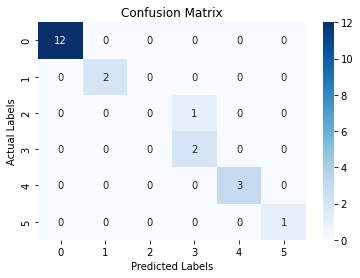

In [40]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()